In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv("resultado_unificados_5.tsv", sep="\t", header=0, encoding="cp1252")

In [20]:
dataset.head(5)

,ID,code_original,nl,response,code,BLEU,CODE_BLEU,EM,parse_success,processed,model_id,technique
0,1,int function ( ) { _total = extractList ( ) . ...,actually walks the bag to make sure the count ...,"{\n ""id"": ""chatcmpl-bh546umeaqdr37ntmzuqb"",\n...",public class BagCounter { private int itemC...,0.001093,0.392768,0,True,True,phi-3.1-mini-128k-instruct,baseline
1,2,void function ( boolean arg0 ) { fStatementsRe...,controls whether the compiler should perform s...,"{\n ""id"": ""chatcmpl-jaus6owif6p5ifh68j1bnd"",\...",public class CompilerOptions { private bool...,0.004039,0.000000,0,True,True,phi-3.1-mini-128k-instruct,baseline
2,3,boolean function ( ) { return false ; },override and return true for database updates ...,"{\n ""id"": ""chatcmpl-lzepv3o6nodgf19kg758r"",\n...",@Overridepublic boolean updateClassMetadata() ...,0.002585,0.268905,0,True,True,phi-3.1-mini-128k-instruct,baseline
3,4,String function ( String arg0 ) { return ZKUti...,get identity znode .,"{\n ""id"": ""chatcmpl-2aam9aqqr4ezyisz7bk8a"",\n...",import org.apache.zookeeper.Watcher;import org...,0.000422,0.000000,0,True,True,phi-3.1-mini-128k-instruct,baseline
4,5,int function ( GenVector < C > arg0 ) { if ( !...,"compareto , lexicogaphical comparison .","{\n ""id"": ""chatcmpl-uam8mq0iwxdglmunjbgv7r"",\...",public class LexicographicalComparison { pu...,0.001471,0.000000,0,True,True,phi-3.1-mini-128k-instruct,baseline


In [21]:
# Parámetro para los TOP/BOTTOM
N = 15

# Función para computar estadísticas por modelo+técnica
def resumen_modelo(x):
    return pd.Series({
        "CODE_BLEU_mean": x["CODE_BLEU"].mean(),
        "CODE_BLEU_median": x["CODE_BLEU"].median(),
        f"TOP@{N}": x["CODE_BLEU"].nlargest(N).mean(),
        f"BOTTOM@{N}": x["CODE_BLEU"].nsmallest(N).mean(),
    })

# Agrupar por model_id y technique
tabla_resultados = (
    dataset
    .groupby(["model_id", "technique"])
    .apply(resumen_modelo)
    .reset_index()
)

# Ordenar por mejor promedio (opcional)
tabla_resultados = tabla_resultados.sort_values("CODE_BLEU_mean", ascending=False)

tabla_resultados

C:\Users\Rikudo\AppData\Local\Temp\ipykernel_22512\1943744296.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(resumen_modelo)


,model_id,technique,CODE_BLEU_mean,CODE_BLEU_median,TOP@15,BOTTOM@15
27,starcoder2-7b-ls-GGUF/starcoder2-7b-ls.Q4_K_S....,few-shot-gpt,0.371045,0.376329,0.565622,0.158368
26,starcoder2-7b-ls-GGUF/starcoder2-7b-ls.Q4_K_S....,few-shot,0.364359,0.339376,0.594634,0.172730
2,deepseek-coder-6.7b-kexer,few-shot,0.358239,0.327415,0.598068,0.146162
3,deepseek-coder-6.7b-kexer,few-shot-gpt,0.353911,0.362439,0.556575,0.082140
5,deepseek-coder-6.7b-kexer,one-shot-gpt,0.348064,0.353410,0.558412,0.093420
29,starcoder2-7b-ls-GGUF/starcoder2-7b-ls.Q4_K_S....,one-shot-gpt,0.343939,0.345852,0.573216,0.062742
28,starcoder2-7b-ls-GGUF/starcoder2-7b-ls.Q4_K_S....,one-shot,0.328011,0.314602,0.565181,0.040657
4,deepseek-coder-6.7b-kexer,one-shot,0.321432,0.306874,0.563446,0.042593
1,deepseek-coder-6.7b-kexer,context,0.315761,0.297436,0.505301,0.089891
9,deepseek-r1-distill-qwen-7b,few-shot-gpt,0.314310,0.282379,0.630071,0.000000


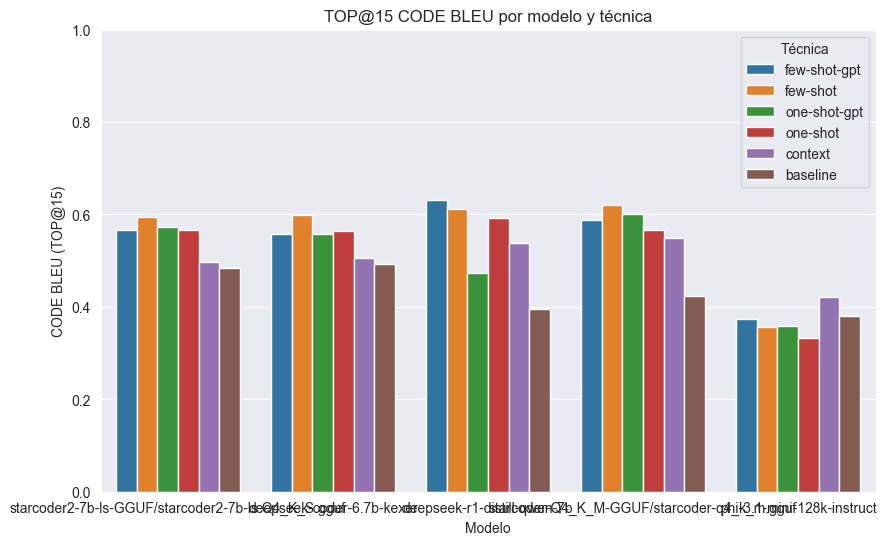

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=tabla_resultados,
    x="model_id", 
    y=f"TOP@{N}",
    hue="technique"   # <- cambiamos aquí
)
plt.title(f"TOP@{N} CODE BLEU por modelo y técnica")
plt.ylabel(f"CODE BLEU (TOP@{N})")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0,1)
plt.show()

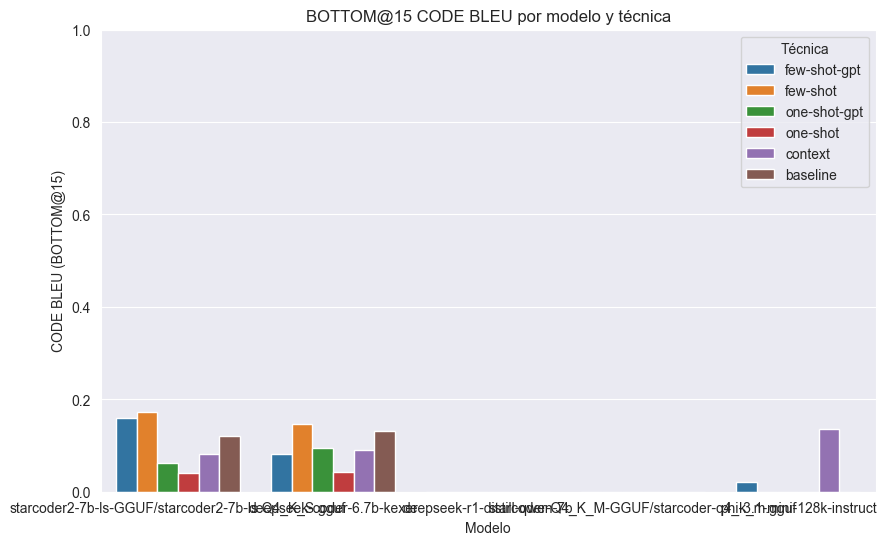

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=tabla_resultados,
    x="model_id",
    y=f"BOTTOM@{N}",
    hue="technique"   # <- cambiamos aquí
)
plt.title(f"BOTTOM@{N} CODE BLEU por modelo y técnica")
plt.ylabel(f"CODE BLEU (BOTTOM@{N})")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0,1)
plt.show()

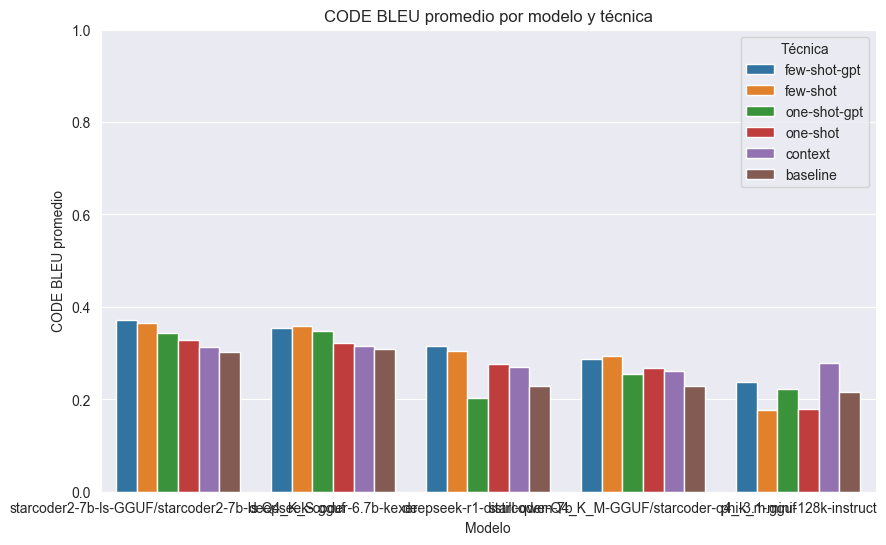

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_resultados,
    x="model_id",
    y=f"CODE_BLEU_mean",
    hue="technique"  # <- cambiamos aquí
)
plt.title(f"CODE BLEU promedio por modelo y técnica")
plt.ylabel(f"CODE BLEU promedio")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0, 1)
plt.show()

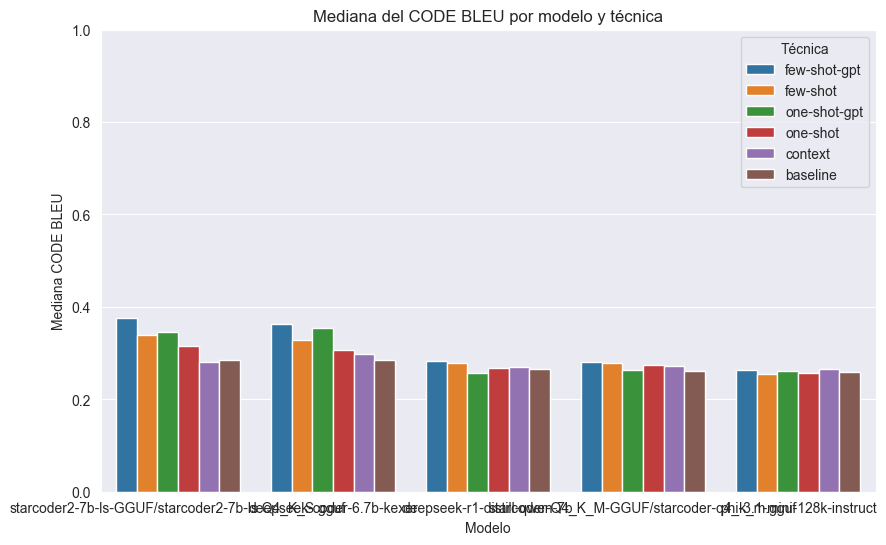

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_resultados,
    x="model_id",
    y=f"CODE_BLEU_median",
    hue="technique"  # <- cambiamos aquí
)
plt.title(f"Mediana del CODE BLEU por modelo y técnica")
plt.ylabel(f"Mediana CODE BLEU")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0, 1)
plt.show()